## Problem Statements:
### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


### Import libraries

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy import stats
import matplotlib.pyplot as plt

### Reading the input csv file

In [2]:
order_form=pd.read_csv("Costomer+OrderForm.csv")
order_form.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


### Convert all the categorical features into numerical features, using label encoding

In [11]:
order_form=order_form.apply(LabelEncoder().fit_transform)
order_form.head()

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1


In [9]:
len(order_form)

300

### H0 - Percentage of defects does not vary with different centres
### H1 - Percentage of defects varies with different centres

### Calculating the defective percentage in each country

In [15]:
t={'country':['Phillippines','Indonesia','Malta','India'],
  'Defect_Percentage':[100-(sum(order_form.Phillippines)/len(order_form))*100,100-(sum(order_form.Indonesia)/len(order_form))*100,100-(sum(order_form.Malta)/len(order_form))*100,100-(sum(order_form.India)/len(order_form))*100],
  }
t=pd.DataFrame(t)
t

,country,Defect_Percentage
0,Phillippines,9.666667
1,Indonesia,11.000000
2,Malta,10.333333
3,India,6.666667


### Visualising the defective percentage

([<matplotlib.patches.Wedge at 0x1224c1610>,
 [Text(0.7614310941829021, 0.7938656616905838, 'Phillippines'),
  Text(-0.9005796859567531, 0.6316298197853203, 'Indonesia'),
  Text(-0.4315240201416201, -1.011823611130327, 'Malta'),
  Text(0.9342905020967809, -0.5806042177695107, 'India')])

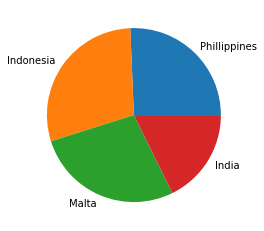

In [32]:
plt.pie(t.Defect_Percentage,labels=t.country)

### Using one way anova to carry the test on the hypothesis, that is made

In [4]:
stats.f_oneway(order_form["Phillippines"],order_form["Indonesia"],order_form["Malta"],order_form["India"])

F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)

## Conclusion:
### P value is 0.277, which is greater than 0.05, So we accept null hypothesis
### Thus, Percentage of defects does not vary with different centres